**MNIST 임포트**

In [2]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt
# 주피터에서 matplotlib 사용하기 위해

print(tf.__version__)

2.3.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 변수를 만들어 따로 저장

**탐색**

In [5]:
train_images.shape # 60,000개의 이미지, 각 28X28픽셀

(60000, 28, 28)

In [6]:
len(train_labels) # 60,000개의 레이블

60000

In [7]:
train_labels # 0~9 사이의 정수

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape # 10,000개의 이미지, 각 28X28픽셀

(10000, 28, 28)

In [9]:
len(test_labels) # 10,000개의 레이블

10000

**전처리**

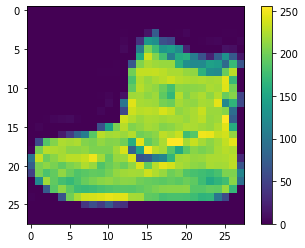

In [10]:
plt.figure() # matplotlib으로 그림그림
plt.imshow(train_images[0]) # train_images[0]을 그릴 것
plt.colorbar()
plt.grid(False) # grid 없앰
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# 값의 범위를 0~1사이로 조정하기 위해

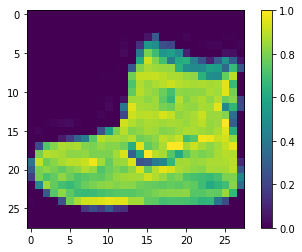

In [13]:
plt.figure()
plt.imshow(train_images[0]) 
plt.colorbar()
plt.grid(False) 
plt.show()

# 다시 그려보니 0~1사이의 값 가짐

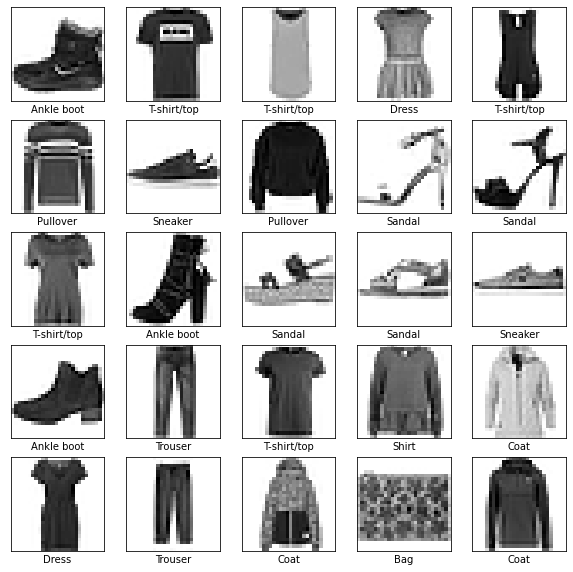

In [20]:
plt.figure(figsize=(10,10)) # 그림크기 10x10
for i in range(25): # 총 25개 그림
    plt.subplot(5,5,i+1) # 세로5개, 가로5개 총 25개
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # cmap=plt.cm.binary : 흑백으루
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**층설정**

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 1번째 레이어, Flatten에서 28x28픽셀의 이미지를 1차원 배열로 변환
    keras.layers.Dense(128, activation='relu'),
    # 2번째 레이어, Dense에서 128개의 노드
    keras.layers.Dense(10, activation='softmax')
    # 3번째 레이어, Dense에서 10개의 노드
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 573us/step - loss: 0.5036 - accuracy: 0.8224
Epoch 2/5
1875/1875 [==============================] - 1s 598us/step - loss: 0.3824 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 1s 585us/step - loss: 0.3426 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 1s 577us/step - loss: 0.3169 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 1s 564us/step - loss: 0.2982 - accuracy: 0.8909


**정확도 평가**

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

# test셋의 정확도 < train셋의 정확도 : 오버피팅

313/313 - 0s - loss: 0.3449 - accuracy: 0.8760

테스트 정확도: 0.8759999871253967


**예측**

In [26]:
predictions = model.predict(test_images)

In [27]:
predictions[0]

array([7.38999233e-06, 1.11739529e-09, 9.67277401e-07, 1.87960813e-06,
       5.14854310e-06, 1.45542575e-02, 8.42992722e-06, 1.55732613e-02,
       2.85267131e-04, 9.69563365e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([]) # 눈금(tick) 표시
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
    # predictions에서 가장 큰 값을 predicted_label로 가져옴
  if predicted_label == true_label:
    color = 'blue' # test_label과 일치 -> 블루
  else:
    color = 'red' # 불일치 -> 레드

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

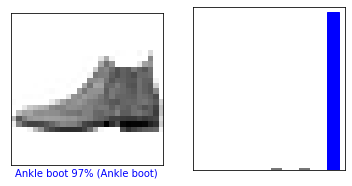

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

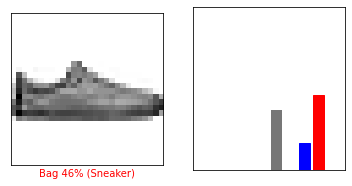

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

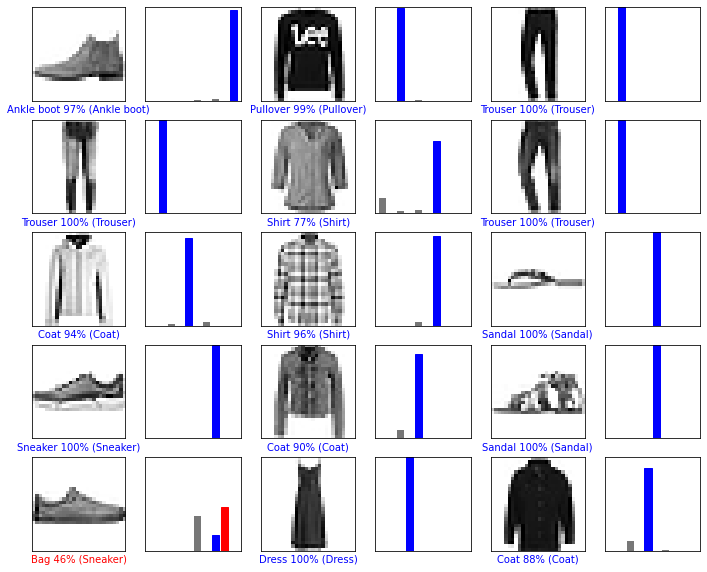

In [53]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) # 행
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [34]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0] # 첫번째걸루

print(img.shape)

(28, 28)


In [36]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0)) # 차원추가 (28, 28) -> (1, 28, 28)

print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.38999961e-06 1.11739529e-09 9.67276492e-07 1.87960813e-06
  5.14854310e-06 1.45542445e-02 8.42992722e-06 1.55732613e-02
  2.85267131e-04 9.69563365e-01]]


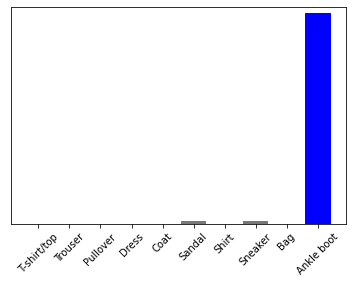

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])

9